#### 基本ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### データのインポートと前処理

ここでは、Boston近郊の住宅地データについて、目的変数(どれだけ住みやすいかのスコア?)の予測を行う。

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
raw_df
# raw_df.iat[1,1]

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


本来なら1行の中に入るはずが折り返されてしまっているデータが存在するので、それらを11,12,13列目に格納する。

In [3]:
#新たなrawを作る
raw_df[11] = 0
raw_df[12] = 0
raw_df[13] = 0
for j in range(3):
  for i in range(1011):
    raw_df.iat[i, 11+j] = raw_df.iat[i+1, j]
raw_df2 = raw_df.dropna()
df = raw_df2.rename(columns = {0:'CRIM',1:'ZN',2:'INDUS',3:'CHAS',4:'NOX',5:'RM',6:'AGE',7:'DIS',8:'RAD',9:'TAX',10:'PTRATIO',11:'B',12:'LSTAT',13:'Target'}, index=lambda s: int(s/2))
df
t = df['Target'].values
x = df.drop(labels=['Target'], axis=1).values

In [4]:
from sklearn.model_selection import train_test_split
# 30％をテストデータに分割
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=424)

### 1 線形回帰

#### 1.1 重回帰分析

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [6]:
model.fit(x_train, t_train)

LinearRegression()

In [7]:
model.coef_

array([-1.31725553e-01,  3.74132316e-02,  4.59505980e-02,  1.06859817e+00,
       -1.55035257e+01,  3.82196396e+00, -5.28719565e-03, -1.41666852e+00,
        3.60711002e-01, -1.65685471e-02, -1.01087914e+00,  8.58652380e-03,
       -5.31148060e-01])

<BarContainer object of 13 artists>

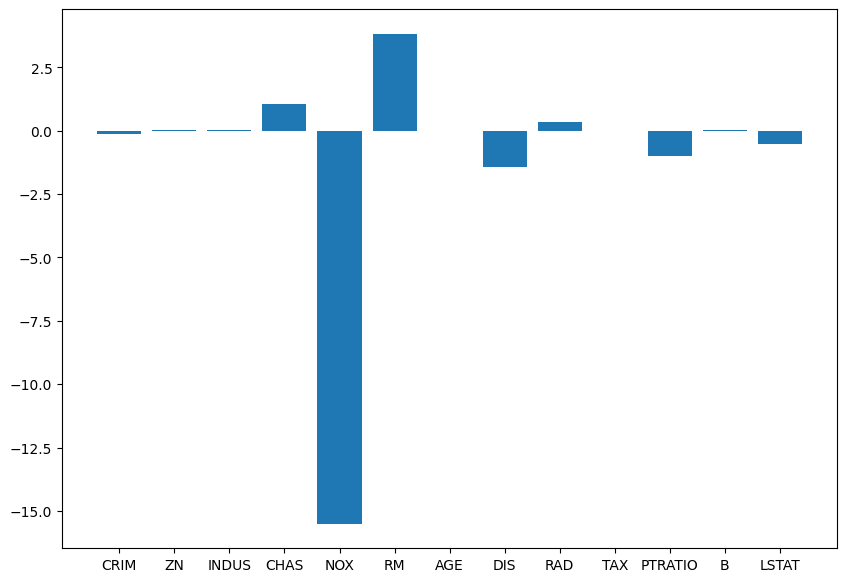

In [8]:
plt.figure(figsize=(10,7))
left = np.array(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
plt.bar(x=left, height=model.coef_)

In [9]:
model.intercept_

37.785084523952605

In [10]:
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.7438344902840941
test score :  0.7200104179427399


訓練スコアがテストデータを上回ってしまった。

これは**過学習**が起こっていることを示している。

In [11]:
y = model.predict(x_test)

In [12]:
print('予測値: ', y[0])
print('目標値: ', t_test[0])

予測値:  17.914749300074128
目標値:  19.5


#### 1.2 Ridge回帰

In [13]:
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=1)

In [15]:
model2.fit(x_train, t_train)

Ridge(alpha=1)

In [16]:
model2.coef_

array([-0.1278917 ,  0.03803952,  0.00928398,  0.93983693, -8.09591465,
        3.86648257, -0.01127497, -1.30024529,  0.34010201, -0.01702281,
       -0.92336992,  0.00888803, -0.54094015])

<BarContainer object of 13 artists>

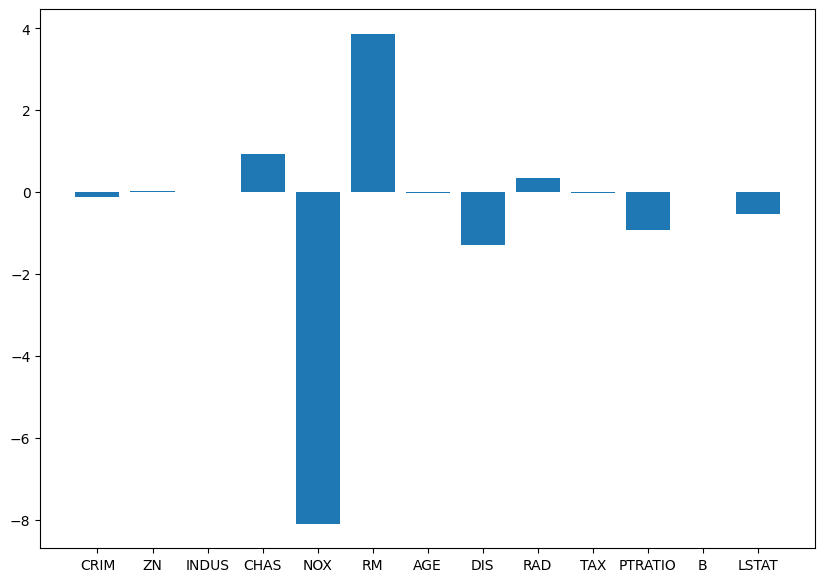

In [17]:
plt.figure(figsize=(10,7))
left = np.array(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
plt.bar(x=left, height=model2.coef_)

In [18]:
print('train score : ', model2.score(x_train, t_train))
print('test score : ', model2.score(x_test, t_test))

train score :  0.7418204667553785
test score :  0.7130474091495267


あまり変わらない

In [21]:
y2 = model2.predict(x_test)
print('予測値:', y2[0])
print('目標値' ,t_test[0])

予測値: 17.631767614249785
目標値 19.5
